# Data Science Workshop
This session is designed to familiarize you with exploring datasets within Python

**Python 3 Shortcuts** 



Before we begin, below are a few shortcuts available in Python 3 

<ol>
    <li>Run Cell - Ctrl + Enter</li>
    <li>Save - Ctrl + S</li>
    <li>Run Current Cell and Add Below - Alt + Enter</li>
    <li>Comment/Uncomment - Ctrl + ?</li>
    <li>Change Cell to Markdown - While in Command mode (press esc), select M </li>
</ol>

# Exploratory Data Analysis (EDA)
The following Python script demonstrates the fundamental steps in understanding the start of any data science project, exploratory data analysis. Exploratory data analysis helps you understand what the data represents and what's missing. <br>

During this process, you will learn how to:
<li> Assess quality of your data </li>
<li> Identify data types </li> 
<li> Display data visually </li>
<li> Calculate associations/correlations between features </li> 
<li> Cast variables </li> 
<li> Identify patterns </li>
And so much more!

## What is EDA?

Exploratory Data Analysis (EDA) examines a data set to expose errors, clean and transform data, identify trends and relationships, and quickly distinguish data structure details.

## Why is EDA Important?

EDA helps:
<li> Discern patterns and insights </li> 
<li> Identify errors </li>
<li> Form hypotheses </li>
<li> Summarize a data set </li> 
And it is good practice!

## Things to Keep in Mind:
<ol>
     
<li> EDA is never done. Remember the data science cycle (shown below). Even after you build your model, you may return to EDA to make sure your results make sense.
    
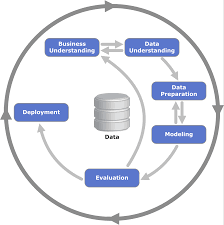 </li><br><br>
    
<li> Be open-minded. Remember, feature selection is extremely difficult and can be a source of bias. However, the goal is to challenge your assumptions and those of the stakeholder for whom the analysis is for, and part of that starts with your EDA. </li> <br><br>   
    

<li> Repeat EDA for every new iteration or hypothesis. Just because you've done EDA on a dataset before doesn't mean you shouldn't do it again if there are any changes.</li>
    
<ol/>

## Examples of EDA Questions to Ask Yourself

<ol>
    <li> What is my target variable? </li>
    <li> Is there enough data to build a model? </li>
    <li> What values are missing and why? </li>
    <li> Are there numerical values reported as string or vice versa? </li>
    <li> Are there features/variables that are redundant? </li>
    <li> What values are common? Conversely, what values stand out? </li>
    <li> Is there a relationship between features and/or your target variable? </li>
    <li> Are there gaps in data? </li>

<ol/>

# Setup
Before we begin any project, we have to setup our enviroment with the necessary packages.


## Library Import
We import all the required Python libraries

In [1]:
## Note: pip installs python packages in any environment.
##       conda installs any package in conda environments.

## Install a pip/conda package in the current Jupyter Kernel 
import sys 

# Check Python Version
print('Current python version: ', sys.version)

## Data manipulation
## -m <module-name>
## Pandas is an open-source Python package used for data manipulation
!{sys.executable} -m pip install pandas 
import pandas as pd

!{sys.executable} -m pip install pandas_gbq
import pandas_gbq

# Options for pandas
pd.options.display.max_columns = 150
pd.options.display.max_rows = 130

## Used to read and write to BigQuery
!{sys.executable} -m pip install -U google-cloud-bigquery[bqstorage,pandas]
from google.cloud import bigquery ## used to execute BigQuery SQL in Python
import os, re, csv, requests

## Package used for computing mathematical functions
!{sys.executable} -m pip install numpy
import numpy as np

# Visualizations
!{sys.executable} -m pip install plotly
import plotly
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)

!{sys.executable} -m pip install matplotlib 
import matplotlib.pyplot as plt

!{sys.executable} -m pip install seaborn
import seaborn as sns

!{sys.executable} -m pip install scipy 
import scipy.stats as stats

!{sys.executable} -m pip install dython
from dython.nominal import associations

Current python version:  3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


You should consider upgrading via the 'C:\Users\JXM6NNX\Anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\JXM6NNX\Anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\JXM6NNX\Anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\JXM6NNX\Anaconda3\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Users\JXM6NNX\Anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\JXM6NNX\Anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\JXM6NNX\Anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\JXM6NNX\Anaconda3\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Users\JXM6NNX\Anaconda3\python.exe -m pip install --upgrade pip' command.


# Data Import
Now, let's retrieve all the required data for the analysis.
<br>
For the purposes of this project, we will query from the **Census** table as everyone uses this table. 

In [ ]:
###################################################
## DO NOT RUN CELL - DEMONSTRATION PURPOSES ONLY ##
###################################################

## Data comes in all different forms. As such, Python is adept at accepting data from almost any file type. 
## Below is syntax for how to import your data from the most commonly used file formats.
## Notice that for every import, no matter the file type, we are using the Pandas package.
## Pandas is the best option for getting your data into your notebook.

test_df_csv = pd.read_csv(r'path of where the CSV file is stored\filename.csv') # From a CSV file
test_df_xl = pd.read_excel(r'path of where the CSV file is stored\filename.xlsx') # From an Excel file

In [2]:
## For our EDA, we are going to import our data through BigQuery SQL
## Generate SQL from Google BigQuery
census_sql = '''
SELECT ASSOC_ID
      ,GENDER
      ,ETHNICITY
      ,ADDR_STATEPROVINCE 
      ,LANGUAGE_ID
      ,POS_TITLE
      ,PAY_RATE_TYPE
      ,JOB_PROFILE_NAME
      ,EMPL_STATUS
      ,TERM_INVOL_VOL
      ,TERM_REASON
      ,DIVISION_NAME
      ,REGION_NAME
      ,DISTRICT_NAME
      ,LOC_ID
      ,DEPT_NAME
      ,REPORTING_BUS_UNIT
      ,TIME_IN_POSITION_DT
      ,(DATE_DIFF(CURRENT_DATE, TIME_IN_POSITION_DT, DAY)/30.41) AS TIME_IN_POSITION_CALC
      ,BASE_PAY_AMT
FROM (
SELECT ASSOC_ID
      ,GENDER
      ,ETHNICITY
      ,ADDR_STATEPROVINCE 
      ,LANGUAGE_ID
      ,POS_TITLE
      ,PAY_RATE_TYPE
      ,JOB_PROFILE_NAME
      ,EMPL_STATUS
      ,TERM_INVOL_VOL
      ,TERM_REASON
      ,DIVISION_NAME
      ,REGION_NAME
      ,DISTRICT_NAME
      ,LOC_ID
      ,DEPT_NAME
      ,REPORTING_BUS_UNIT
      ,CASE 
        WHEN SAFE_CAST(LEGACY_TIME_IN_POSITION_DATE AS DATE) IS NULL THEN CAST(POS_EFF_DATE AS DATE)
        WHEN SAFE_CAST(LEGACY_TIME_IN_POSITION_DATE AS DATE) IS NOT NULL AND CAST(POS_EFF_DATE AS DATE) < SAFE_CAST(LEGACY_TIME_IN_POSITION_DATE AS DATE) THEN SAFE_CAST(LEGACY_TIME_IN_POSITION_DATE AS DATE)
        WHEN SAFE_CAST(LEGACY_TIME_IN_POSITION_DATE AS DATE) IS NOT NULL AND CAST(POS_EFF_DATE AS DATE) > SAFE_CAST(LEGACY_TIME_IN_POSITION_DATE AS DATE) THEN CAST(POS_EFF_DATE AS DATE)
       END AS TIME_IN_POSITION_DT 
      ,BASE_PAY_AMT
FROM `analytics-hrta-thd.WORKDAY.CensusDataMax_Neadwerx_v`
WHERE 1=1 
AND WORK_COUNTRY = 'USA'
AND (EXTRACT(YEAR FROM ORIG_HIRE_DATE)) >= 2020
AND DIVISION_CODE IN ('DIV_0001', 'DIV_0002', 'DIV_0004')
AND REPORTING_BUS_UNIT <> 'Team')      
'''

In [3]:
## Create a dataframe from SQL output
## A dataFrame is a labeled data structure like a table in SQL or an Excel file

census_df = pd.read_gbq(census_sql, project_id='analytics-hrta-thd', dialect='standard') ## This step converts the query to a dataFrame 

In [4]:
## Now that we have created our DataFrame, let's display 5 observations
print("Display of the first 5 rows") 
display(census_df.head()) ## This step displays the first 5 (default value) rows

Display of the first 5 rows


,ASSOC_ID,GENDER,ETHNICITY,ADDR_STATEPROVINCE,LANGUAGE_ID,POS_TITLE,PAY_RATE_TYPE,JOB_PROFILE_NAME,EMPL_STATUS,TERM_INVOL_VOL,TERM_REASON,DIVISION_NAME,REGION_NAME,DISTRICT_NAME,LOC_ID,DEPT_NAME,REPORTING_BUS_UNIT,TIME_IN_POSITION_DT,TIME_IN_POSITION_CALC,BASE_PAY_AMT
0,200203677,Female,Black or African American (Not Hispanic or Lat...,GA,en_US,CASHIER,Hourly,CASHIER,Terminated,Voluntary,Terminate Associate > Voluntary > RESIGNATION,SOUTHERN DIVISION,MIDSOUTH REGION,DISTRICT 0001,0105,CASHIERS/REFUNDS,Store,NaT,NaN,11.000000000
1,200064532,Male,Black or African American (Not Hispanic or Lat...,GA,en_US,CUSTOMER SERVICE ASSOCIATE,Hourly,CUSTOMER SERVICE ASSOCIATE,Terminated,Voluntary,Terminate Associate > Voluntary > ACCEPTED JOB...,SOUTHERN DIVISION,MIDSOUTH REGION,DISTRICT 0001,0105,SPECIAL SERVICES,Store,NaT,NaN,11.000000000
2,200370275,Female,Black or African American (Not Hispanic or Lat...,GA,en_US,CASHIER,Hourly,CASHIER,Terminated,Voluntary,Terminate Associate > Voluntary > JOB ABANDONMENT,SOUTHERN DIVISION,MIDSOUTH REGION,DISTRICT 0001,0105,CASHIERS/REFUNDS,Store,NaT,NaN,12.000000000
3,131220253,Female,Black or African American (Not Hispanic or Lat...,GA,en_US,CUSTOMER SERVICE ASSOCIATE,Hourly,CUSTOMER SERVICE ASSOCIATE,Terminated,Voluntary,Terminate Associate > Voluntary > PERSONAL REA...,SOUTHERN DIVISION,MIDSOUTH REGION,DISTRICT 0001,0105,SPECIAL SERVICES,Store,NaT,NaN,13.000000000
4,200070905,Male,Hispanic or Latino,GA,en_US,SALES ASSOCIATE,Hourly,SALES ASSOCIATE,Terminated,Voluntary,Terminate Associate > Voluntary > ACCEPTED JOB...,SOUTHERN DIVISION,MIDSOUTH REGION,DISTRICT 0001,0105,LUMBER,Store,NaT,NaN,13.000000000


In [5]:
print("Display of the last 5 rows")
display(census_df.tail()) ## This step displays the last 5 (default value) rows

print('\n') ## This creates a blank line

print("Sample of 5 rows")
display(census_df.sample(5)) ## This step displays a sample of the data. Default value is 1, so I specified 5, instead. 

Display of the last 5 rows


,ASSOC_ID,GENDER,ETHNICITY,ADDR_STATEPROVINCE,LANGUAGE_ID,POS_TITLE,PAY_RATE_TYPE,JOB_PROFILE_NAME,EMPL_STATUS,TERM_INVOL_VOL,TERM_REASON,DIVISION_NAME,REGION_NAME,DISTRICT_NAME,LOC_ID,DEPT_NAME,REPORTING_BUS_UNIT,TIME_IN_POSITION_DT,TIME_IN_POSITION_CALC,BASE_PAY_AMT
418505,200361802,Female,Black or African American (Not Hispanic or Lat...,GA,en_US,CASHIER,Hourly,CASHIER,Terminated,Voluntary,Terminate Associate > Voluntary > JOB ABANDONMENT,SOUTHERN DIVISION,MIDSOUTH REGION,DISTRICT 0002,6861,CASHIERS/REFUNDS,Store,NaT,NaN,11.000000000
418506,200431733,Male,Black or African American (Not Hispanic or Lat...,GA,en_US,FREIGHT TEAM ASSOCIATE,Hourly,FREIGHT TEAM ASSOCIATE,Terminated,Voluntary,Terminate Associate > Voluntary > JOB ABANDONMENT,SOUTHERN DIVISION,MIDSOUTH REGION,DISTRICT 0002,6861,PACKOUT TEAM,Store,NaT,NaN,13.000000000
418507,200431813,Male,White (Not Hispanic or Latino),GA,en_US,FREIGHT TEAM ASSOCIATE,Hourly,FREIGHT TEAM ASSOCIATE,Terminated,Voluntary,Terminate Associate > Voluntary > JOB ABANDONMENT,SOUTHERN DIVISION,MIDSOUTH REGION,DISTRICT 0002,6861,PACKOUT TEAM,Store,NaT,NaN,13.000000000
418508,200006770,Female,White (Not Hispanic or Latino),GA,en_US,CASHIER,Hourly,CASHIER,Terminated,Voluntary,Terminate Associate > Voluntary > JOB ABANDONMENT,SOUTHERN DIVISION,MIDSOUTH REGION,DISTRICT 0002,6861,CASHIERS/REFUNDS,Store,NaT,NaN,12.000000000
418509,200021322,Female,White (Not Hispanic or Latino),GA,en_US,SALES ASSOCIATE,Hourly,SALES ASSOCIATE,Terminated,Involuntary,Terminate Associate > Involuntary > ATTENDANCE...,SOUTHERN DIVISION,MIDSOUTH REGION,DISTRICT 0002,6861,GARDEN/SEASONAL,Store,NaT,NaN,12.000000000




Sample of 5 rows


,ASSOC_ID,GENDER,ETHNICITY,ADDR_STATEPROVINCE,LANGUAGE_ID,POS_TITLE,PAY_RATE_TYPE,JOB_PROFILE_NAME,EMPL_STATUS,TERM_INVOL_VOL,TERM_REASON,DIVISION_NAME,REGION_NAME,DISTRICT_NAME,LOC_ID,DEPT_NAME,REPORTING_BUS_UNIT,TIME_IN_POSITION_DT,TIME_IN_POSITION_CALC,BASE_PAY_AMT
140498,200123562,Male,Hawaiian or Pacific Islander (Not Hispanic or ...,CA,en_US,LOT ASSOCIATE,Hourly,LOT ASSOCIATE,Terminated,Voluntary,Terminate Associate > Voluntary > TERMINATION ...,WESTERN DIVISION,PAC SOUTH REGION,DISTRICT 0171,6639,LOT,Store,NaT,NaN,13.000000000
336784,116661620,Choose not to Disclose,White (Not Hispanic or Latino),TX,en_US,FREIGHT TEAM ASSOCIATE,Hourly,FREIGHT TEAM ASSOCIATE,Active,,,SOUTHERN DIVISION,GULF REGION,DISTRICT 0228,6538,PACKOUT TEAM,Store,2020-02-12,17.099638,17.000000000
406299,200234930,Male,White (Not Hispanic or Latino),WI,en_US,CASHIER,Hourly,CASHIER,Terminated,Voluntary,Terminate Associate > Voluntary > JOB ABANDONMENT,NORTHERN DIVISION,NORTHERN PLAINS REGION,DISTRICT 0195,4930,CASHIERS/REFUNDS,Store,NaT,NaN,13.000000000
111100,200313116,Male,White (Not Hispanic or Latino),MI,en_US,APPLIANCE SALES ASSOCIATE,Hourly,APPLIANCE SALES ASSOCIATE,Terminated,Voluntary,Terminate Associate > Voluntary > TERMINATION ...,NORTHERN DIVISION,MIDWEST REGION,DISTRICT 0320,2751,APPLIANCES,Store,NaT,NaN,15.000000000
178312,200250085,Female,Hispanic or Latino,IA,en_US,CASHIER,Hourly,CASHIER,Active,,,NORTHERN DIVISION,NORTHERN PLAINS REGION,DISTRICT 0226,2114,CASHIERS/REFUNDS,Store,2020-09-11,10.128247,13.000000000


# Data Processing

Once the data is imported into a Pandas dataframe, we can begin to explore the data.

## Dataframe Information (Shape, Data Types, Columns, Etc.)

In [6]:
## First, let's check the shape of our dataframe 
print("The shape of the dataframe is: " + str(census_df.shape)) ## tuple (ordered list) with dimensions

The shape of the dataframe is: (418510, 20)


In [7]:
census_df.shape

(418510, 20)

In [8]:
## Let's check the data types of our data frame. 
## Occasionally, in importing the data, data types are stored differently 
## than what we need 
## Check data types
census_df.dtypes

ASSOC_ID                         object
GENDER                           object
ETHNICITY                        object
ADDR_STATEPROVINCE               object
LANGUAGE_ID                      object
POS_TITLE                        object
PAY_RATE_TYPE                    object
JOB_PROFILE_NAME                 object
EMPL_STATUS                      object
TERM_INVOL_VOL                   object
TERM_REASON                      object
DIVISION_NAME                    object
REGION_NAME                      object
DISTRICT_NAME                    object
LOC_ID                           object
DEPT_NAME                        object
REPORTING_BUS_UNIT               object
TIME_IN_POSITION_DT      datetime64[ns]
TIME_IN_POSITION_CALC           float64
BASE_PAY_AMT                     object
dtype: object

In [9]:
## Sometimes it is necessary to convert datatypes 
## Convert column to new datatype
census_df=census_df.astype({"BASE_PAY_AMT": float})

census_df.dtypes ## recheck dataframe types

ASSOC_ID                         object
GENDER                           object
ETHNICITY                        object
ADDR_STATEPROVINCE               object
LANGUAGE_ID                      object
POS_TITLE                        object
PAY_RATE_TYPE                    object
JOB_PROFILE_NAME                 object
EMPL_STATUS                      object
TERM_INVOL_VOL                   object
TERM_REASON                      object
DIVISION_NAME                    object
REGION_NAME                      object
DISTRICT_NAME                    object
LOC_ID                           object
DEPT_NAME                        object
REPORTING_BUS_UNIT               object
TIME_IN_POSITION_DT      datetime64[ns]
TIME_IN_POSITION_CALC           float64
BASE_PAY_AMT                    float64
dtype: object

## Special Characters in Column Names

Let's remove any characters from column names that would prevent us from being able to process in GCP or elsewhere. 

In [ ]:
## Create a dictionary of special characters
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^",
              "`","{","|","}","~","–","\n"]
    
## Create a loop to remove characters from each column    
## Remove special characters listed above from column names
for char in spec_chars:
    census_df.columns = census_df.columns.str.replace(char, '')

## Drop Columns
Let's drop any columns we do not need for our model.

In [ ]:
########################################################
#### DO NOT RUN CELL - DEMONSTATION PURPOSES ONLY ######
########################################################

## Drop unwanted columns
## Inplace = True means the data is modified within the original data frame
## Axis = 1 refers to the column, 0 refers to the rows
df.drop('column_name', axis=1, inplace=True) ## Drop 1 column
df.drop(columns=['column_1', 
                 'column_2', 
                 'column_3'], axis=1, inplace=True) ## Drop multiple columns

## Rename Columns

We have the option to rename some of our columns - here is how

In [319]:
## Rename columns
census_df.rename(columns={'REPORTING_BUS_UNIT' : 'BUSINESS_UNIT'})

In [320]:
## Now that we have renamed our column, let's DOUBLE-CHECK our work by calling a list of our column names
census_df.columns.to_list()

## Map Column Values

Mapping allows you to efficiently process and transform a function on multiple items without having to create a loop.

In [160]:
## Let's map values in Ethnicity to either Minority or Non-minority
census_df['ETHNICITY'] = census_df['ETHNICITY'].map(lambda x: 'NON-MINORITY' if "White (Not Hispanic or Latino)" in x else 'MINORITY')

In [321]:
## Let's check our work!
census_df['ETHNICITY'].unique()

## Missing Values

Datasets often have missing values, which can cause problems for many machine learning models. As such, it is important identify and replace missing values (also known as imputation).

### Identifying Missing Values
Let's check for missing values in our **Census** dataset

In [324]:
###### OPTION 1 ######
## Display all columns and the sum of null values, if any
census_df.isnull().sum()

In [323]:
###### OPTION 2 ######
## Step 1:
null_columns = census_df.isnull().sum() ## provides the sum of nulls in each column
print("Step 1: Find sum of null values in all columns: \n", null_columns)

print('\n')

## Step 2:
print("Step 2: Limit to columns with null values > 0: \n")
display(null_columns[null_columns > 0]) ## limits to columns with null greater than 0

In [322]:
###### OPTION 3 ######

## Identify which columns contain null values
## Display the column name, sum of total null values, as well as percent
count_nan= census_df.isnull().values.sum() ## Sum of total nan values
nan_columns=census_df.columns[census_df.isnull().any()]  ## Create an index of columns with null values - list is just a list of columns that contain any null values
if (count_nan > 0): ## If null values > 1 execute for loop
    for column in nan_columns:
        ttl_nans=census_df[column].isnull().sum() 
        percent_missing=round(census_df[column].isnull().sum() * 100 / len(census_df), 1)
        print(column)
        print("Total Null Values in Column: " + str("{:,}".format(ttl_nans)))
        print("Percent Missing of Total Values in Column: " + str(percent_missing))
        print('\n')
else:
    print("No missing values found in the dataset")

### Handling Missing Values

*Imputation* is a method of filling missing data. 

In [ ]:
########################################################
#### DO NOT RUN CELL - DEMONSTATION PURPOSES ONLY ######
########################################################

## Handle missing values Options
## EXAMPLE - Replace missing values in a column with Not Available
df['COLUMN'].fillna('NA', inplace=True) 

## EXAMPLE - Replace ALL missing values with Not Available
df.fillna('NA', inplace=True) 

## EXAMPLE - Replace missing values in a column with the mean of that column
df['COLUMN'].fillna(df['COLUMN'].mean(), inplace=True) ## Replace missing values with mean of column 


## EXAMPLE - Replace missing values with mode of column - also good for categorical features
df['COLUMN'].fillna(df['COLUMN'].mode()[0], inplace=True) 

In [61]:
## Drop rows where Null values exist - axis = 0 refers to rows
## How options - 'Any' which will drop that row or columns if ANY null values exist OR 
## 'All' which will drop that row or column if ALL values are null. If you didn't specify the how parameter, the default is 'any'

census_df.dropna(axis=0, how='any', inplace=True) 

## Alternatively, we could drop columns that contain null values
# df.dropna(axis=1, inplace=True)

In [325]:
## Now that we have dropped all nulls, let's double check our work
census_df.isnull().sum()

## Duplicate Values
Let's check for duplicate values in our dataset.

In [329]:
## ASSOC_ID is our unique identifier, so we can check duplicates by "filtering" on ID
## Parameter options - keep = ['first', 'last', 'False']
## First - Drop duplicates except for the first occurrence
## Last - Drop duplicates except for the last occurrence
## False - Drop all duplicate

display(census_df[census_df.duplicated('ASSOC_ID', keep=False)].sort_values('ASSOC_ID'))

In [330]:
## Now that we have identified our duplicates, let's drop all duplicates values EXCEPT the first occurrence  
census_df.drop_duplicates()

In [331]:
## ALWAYS double-check our work
census_df[census_df.duplicated()]

## Other Data Processing Techniques

<li> Reset Index </li>

In [35]:
########################################################
#### DO NOT RUN CELL - DEMONSTATION PURPOSES ONLY ######
########################################################

## Changes the index to the column specified 
df.set_index('COLUMN_NAME')

## Changes the index to the column specified while creating a new column with the old index
df.reset_index().set_index('COLUMN_NAME')

## Reverts the dataframe to the original index
df.reset_index(drop=True)

# Data Exploration (Visualize and Describe)
 
**Univariate Analysis** - Summarize only one variable at a time <br>
**Bivariate Analysis** - Compare two variables at a time <br>
**Multivariate Analysis** - Compare three or more variables at a time <br>


* Categorical:
 * Bar plots
* Continuous:
 * Box plots
 * Histogram 

## Describe Data

In [20]:
## Let's describe and summarize our data
## Below are summary statistics of variables in dataframe 

## Summary statistics of object values 
print('Describe all Categorical Variables \n')
display(census_df.describe(include='object').transpose())

print('\n')

## Summary statistics excluding object values
print('Describe all Numerical Variables \n')
display(census_df.describe(exclude='object'))

Describe all Categorical Variables 



,count,unique,top,freq
ASSOC_ID,402570,402570,200116543,1
GENDER,402570,4,Male,255445
ETHNICITY,402570,9,White (Not Hispanic or Latino),177631
ADDR_STATEPROVINCE,402570,56,CA,49979
LANGUAGE_ID,402570,2,en_US,401657
POS_TITLE,402570,359,SALES ASSOCIATE,125194
PAY_RATE_TYPE,402570,5,Hourly,402343
JOB_PROFILE_NAME,401672,94,SALES ASSOCIATE,125397
EMPL_STATUS,402570,2,Terminated,217447
TERM_INVOL_VOL,402570,3,,185123




Describe all Numerical Variables 



,TIME_IN_POSITION_DT,TIME_IN_POSITION_CALC,BASE_PAY_AMT
count,185123,185123.000000,402566.000000
unique,528,NaN,NaN
top,2021-05-24 00:00:00,NaN,NaN
freq,1946,NaN,NaN
first,2020-01-01 00:00:00,NaN,NaN
last,2021-06-11 00:00:00,NaN,NaN
mean,NaN,5.610747,49.785515
std,NaN,4.851292,1567.720660
min,NaN,0.000000,0.000000
25%,NaN,1.512660,12.000000


## Visualize Values

After all the data is processed, it should then be visualized.

<AxesSubplot:>

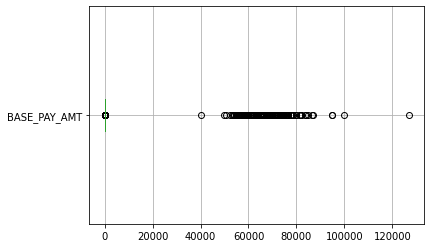

In [21]:
## Let's look at the distribution of base pay amt
census_df['BASE_PAY_AMT'].plot.box(vert = False, grid = True)

In [22]:
## Let's break out the distribution of base pay by pay rate type
census_df.groupby('PAY_RATE_TYPE')['BASE_PAY_AMT'].agg(['min', 'mean', 'max'])

,min,mean,max
PAY_RATE_TYPE,,,
,11.0,13.20000,15.5
Base Hourly + Commission,11.0,11.00000,11.0
Hourly,0.0,13.50061,33.0
Salaried Non-Exempt,40000.0,62475.00000,82000.0
Salary,50000.0,66802.72780,127000.0


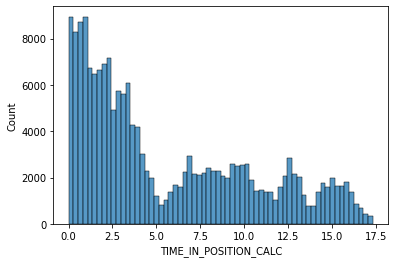

In [23]:
## Let's look at the distribution of time in position through a histogram
sns.histplot(census_df, x='TIME_IN_POSITION_CALC');

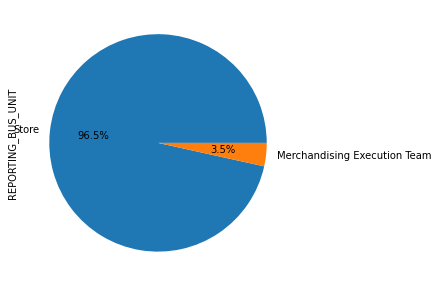

In [24]:
## Let's look at the percent of associates in each Business Unit
census_df['REPORTING_BUS_UNIT'].value_counts(normalize=True).plot.pie(figsize=(5,5), autopct='%1.1f%%');

<AxesSubplot:xlabel='REPORTING_BUS_UNIT', ylabel='BASE_PAY_AMT'>

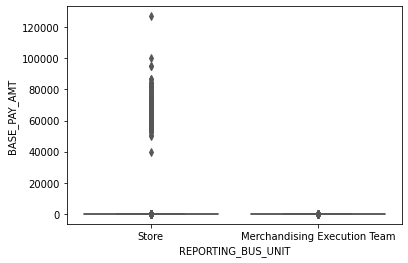

In [25]:
## Let's look at the distribution of base pay in MET vs Store
sns.boxplot(x= "REPORTING_BUS_UNIT",
            y="BASE_PAY_AMT", 
            data=census_df, 
            palette="OrRd")

In [26]:
## Let's look at the average pay by job profile
census_df.groupby('JOB_PROFILE_NAME').agg(AVG_TIP=('TIME_IN_POSITION_CALC', 'mean')).sort_values('AVG_TIP', ascending=False)

,AVG_TIP
JOB_PROFILE_NAME,
MERCHANDISING ASM,13.942782
FFT S&S ASSOCIATE,11.665571
EXPORT ASSOCIATE,11.388798
ASSOCIATE COORDINATOR,10.720158
DELIVERY/WILL CALL COORD,10.202236
TEAM LEADER CUSTOMER SERVICE,9.569221
SALES ASSOCIATE I,9.480088
PRICING ASSOCIATE,8.286748
SCHEDULE WRITER,7.931601


In [27]:
## Let's look at the count of associates by State and reporting business unit
census_df_state = census_df.groupby(['ADDR_STATEPROVINCE', 'REPORTING_BUS_UNIT']).agg(ASSOC_COUNT_BY_STATE=('ASSOC_ID', 'count'))
census_df_state.sort_values(['ASSOC_COUNT_BY_STATE', 'REPORTING_BUS_UNIT'], ascending=False)
census_df_state.reset_index(inplace=True)
census_df_state

,ADDR_STATEPROVINCE,REPORTING_BUS_UNIT,ASSOC_COUNT_BY_STATE
0,,Merchandising Execution Team,59
1,,Store,1378
2,AK,Merchandising Execution Team,78
3,AK,Store,1139
4,AL,Merchandising Execution Team,173
5,AL,Store,4690
6,AR,Merchandising Execution Team,77
7,AR,Store,2341
8,AZ,Merchandising Execution Team,272
9,AZ,Store,11594


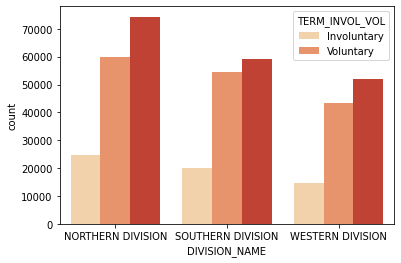

In [28]:
## Let's display count of involuntary and voluntary terms by Division
sns.countplot(x='DIVISION_NAME', hue='TERM_INVOL_VOL', data=census_df, palette="OrRd");

In [29]:
## Create a multi-index frequency table using unstack
## Apply groupby function to group data by Division Name and Term involuntary/voluntary category
## Size provides the count of data in each group
## Unstacking a DF means moving the innermost row index to become the innermost cols index - another form of pivot
census_df.groupby(['DIVISION_NAME', 'TERM_INVOL_VOL']).size().unstack(level=0)

DIVISION_NAME,NORTHERN DIVISION,SOUTHERN DIVISION,WESTERN DIVISION
TERM_INVOL_VOL,,,
,74308,58992,51823
Involuntary,24882,20195,14518
Voluntary,59907,54540,43405


Text(0.5, 0.98, 'Gender Count by Division')

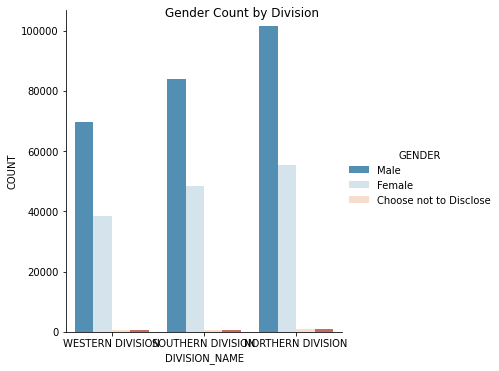

In [30]:
## Display frequency table in graph of two categorical variables - Division and Gender
## First let's create a new dataframe which contains our groupby values
census_df_gender = census_df.groupby(['DIVISION_NAME', 
                                     'GENDER']).size().to_frame('COUNT').sort_values(['DIVISION_NAME', 
                                                                                      'GENDER'], ascending=False)

## Next, we will apply that dataframe to the Seaborn catplot function
gph_div = sns.catplot(x="DIVISION_NAME", 
                      y="COUNT", 
                      hue="GENDER", 
                      kind="bar", 
                      data=census_df_gender.reset_index(), 
                      palette="RdBu_r")
gph_div.fig.suptitle("Gender Count by Division")

In [31]:
## Display top 10 term reasons associates were terminated
term_reason=census_df.groupby(['TERM_INVOL_VOL', 'TERM_REASON']).size().to_frame('COUNT')
top_10_term=term_reason.nlargest(10, 'COUNT')
top_10_term

COUNT
TERM_INVOL_VOL TERM_REASON                                               
                                                                   185123
Voluntary      Terminate Associate > Voluntary > RESIGNATION        75905
               Terminate Associate > Voluntary > JOB ABANDONMENT    51337
Involuntary    Terminate Associate > Involuntary > END OF TEMP...   27594
               Terminate Associate > Involuntary > ATTENDANCE/...   11738
               Terminate Associate > Involuntary > CONDUCT/POL...   10541
Voluntary      Terminate Associate > Voluntary > ACCEPTED JOB-...    8838
               Terminate Associate > Voluntary > PERSONAL REASONS    8489
               Terminate Associate > Voluntary > TERMINATION -...    3399
Involuntary    Terminate Associate > Involuntary > DISCONTINUE...    3176

 Correlation Matrix

C:\Users\KXC1OJ2\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



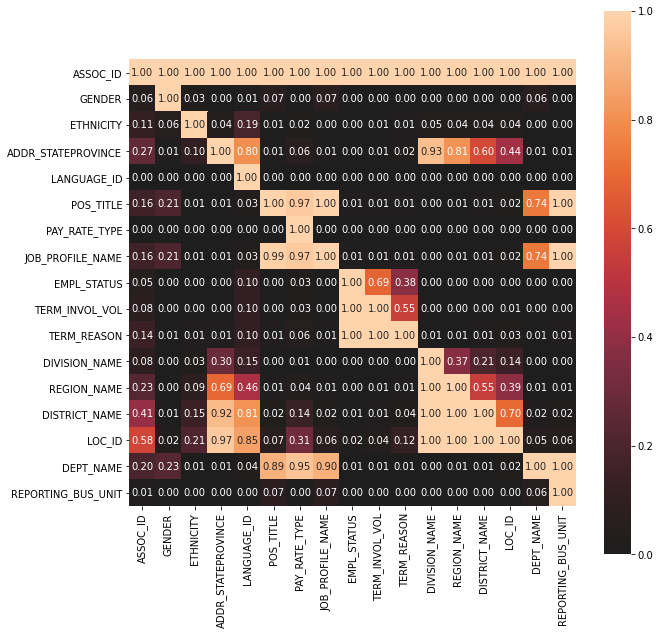

{'corr':                     ASSOC_ID    GENDER  ETHNICITY  ADDR_STATEPROVINCE  \
 ASSOC_ID            1.000000  1.000000   1.000000            1.000000   
 GENDER              0.055496  1.000000   0.030493            0.002139   
 ETHNICITY           0.112007  0.061543   1.000000            0.043279   
 ADDR_STATEPROVINCE  0.266052  0.010255   0.102802            1.000000   
 LANGUAGE_ID         0.001246  0.000276   0.002085            0.003744   
 POS_TITLE           0.163471  0.206798   0.007596            0.007020   
 PAY_RATE_TYPE       0.000390  0.000008   0.000060            0.000093   
 JOB_PROFILE_NAME    0.162271  0.205762   0.006901            0.005983   
 EMPL_STATUS         0.053459  0.001981   0.002312            0.000877   
 TERM_INVOL_VOL      0.078038  0.002499   0.004750            0.002242   
 TERM_REASON         0.140646  0.005424   0.010827            0.008492   
 DIVISION_NAME       0.084250  0.000310   0.034090            0.295686   
 REGION_NAME         0.226818 

In [32]:
##Let's look at the correlation of the variables 
## A correlation matrix shows the relationship (negative or positive) between two variables. 
## The closer the coefficients between variables is to 1, the more correlated. 
## Or, in other words, the more likely a relationship exists between these two variables and not by chance.


## Correlation matrix of categorical varaibles
## Theil_u (aka the uncertaintiy coefficient) is a measure of nominal association
corr_df_cat=census_df.select_dtypes(include='object')
associations(corr_df_cat, theil_u=True, figsize=(10,10))

In [345]:
## Correlation Matrix Visualization 
sns.heatmap(census_df.corr(),
            cmap = 'OrRd', ## Set color scheme - we could use Purples, Reds
            annot = True) ## Annotate the matrix with the correlation coefficients


# Writing Data

Finally, when you have finished processing and exploring the data, you can export the data in several ways.

In [ ]:
########################################################
#### DO NOT RUN CELL - DEMONSTATION PURPOSES ONLY ######
########################################################

df.to_csv(r'path to where you want to store CSV\filename.csv', index=False)
df.to_excel(r'path to where you want to store xlsx\filename.xlsx', index=False)
df.to_gbq('FOLDERNAME.TABLENAME', project_id = 'analytics-hrta-stg-thd', if_exists = 'replace')

# EDA Resources
Below are some relevant resources:<br>
1.Data Exploration in Python Infographic Sheet <br>
https://www.analyticsvidhya.com/blog/2015/06/infographic-cheat-sheet-data-exploration-python/ <br>
<br>
2. AutoEDA Resources <br>
https://github.com/mstaniak/autoEDA-resources <br>
<br>
3. Rapid-Fire EDA <br>
https://www.analyticsvidhya.com/blog/2021/04/rapid-fire-eda-process-using-python-for-ml-implementation/ <br>
<br>
4. Python Programmers Must-Have for EDA <br>
https://programmersought.com/article/89927629303/

# Pandas Profiling

Pandas Profiling is one of many open source Python modules that can quickly do an exploratory data analysis with just a few lines of code.

In [175]:
## Create Profiling output in HTML
!{sys.executable} - pip install pandas-profiling
import pandas_profiling

Profile = census_df.profile_report(title="Census Table Test Profiling")
Profile.to_file(output_file= r'C:\Users\KXC1OJ2\Downloads\pandas_profiling_census.html')